In [23]:
from matplotlib import pyplot as plt
import numpy as np

NAME | COMMENT
-----|---------
**label_names** | The array contains label names.
**train_data** | The array contains images with shape of (3, 32, 32)
**train_label** | The array contains images' label.
**filenames** | The array contains images' name.

In [30]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train_data = None
train_label = []
filenames = []

meta_data = unpickle('./cifar-10-batches-py/batches.meta')
label_names = np.array(meta_data[b'label_names'])

for i in range(1, 6):
    data_dict = unpickle('./cifar-10-batches-py/data_batch_{}'.format(i))
    if i == 1:
        train_data = data_dict[b'data']
    else:
        train_data = np.vstack((train_data, data_dict[b'data']))
    train_label += data_dict[b'labels']
    filenames += data_dict[b'filenames']

train_data = train_data.reshape((len(train_data), 3, 32, 32))
print(train_data.shape)
print(len(train_label))
print(len(filenames))

(50000, 3, 32, 32)
50000
50000


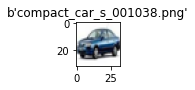

In [36]:
img1 = train_data[105].transpose(1, 2, 0)
plt.figure(figsize=(0.8, 0.8))
plt.title(filenames[105])
plt.imshow(img1)